# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam 

Init Plugin
Init Graph Optimizer
Init Kernel


# Loading MNIST data

In [3]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5   
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


# GAN architecture we are Building



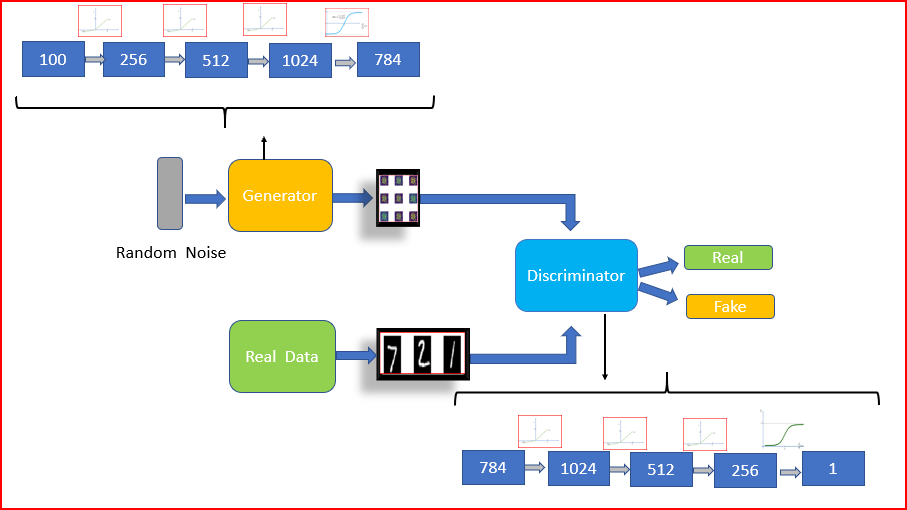

In [4]:
def adam_optimizer():
    return Adam(lr=0.0002)

# Creating a Generator

In [5]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    generator.add(BatchNormalization())
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2)) 
    generator.add(BatchNormalization())
    generator.add(Dropout(0.5))
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))  
    generator.add(BatchNormalization())
    generator.add(Dropout(0.5))
    generator.add(Dense(units=784, activation='tanh'))   
    generator.compile(optimizer=adam_optimizer(),loss='binary_crossentropy')
    return generator
g=create_generator()
g.summary()

Metal device set to: Apple M1


2022-07-07 18:53:31.759421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-07 18:53:31.759501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

/Users/santhoshkurnapally/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Discriminator Function

In [6]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.3))      
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(BatchNormalization())
    discriminator.add(Dropout(0.3))     
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(BatchNormalization())   
    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(units=1, activation='sigmoid'))  
    discriminator.compile(loss='binary_crossentropy', optimizer="sgd")
    return discriminator
d =create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)              

# Creating the GAN

In [7]:
def create_gan(discriminator, generator):
    # At first we are making discriminator weights as constant by not training them
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer="Adam")
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1493520   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1467393   
Total params: 2,960,913
Trainable params: 1,489,936
Non-trainable params: 1,470,977
_________________________________________________________________


# Plotting the Generated Images for visulaization

In [8]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('Images/gan_generated_image %d.png' %epoch)

# Training GAN

Epoch 1


  0%|                                                   | 0/128 [00:00<?, ?it/s]2022-07-07 18:53:32.592028: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-07 18:53:32.593413: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-07 18:53:32.644858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-07 18:53:33.261772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-07 18:53:35.056503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
100%|█████████████████████████████████████████| 128/128 [00:08<00:00, 14.67it/s]
2022-07-07 18:53:41.318243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry

Epoch 2


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.48it/s]


Epoch 3


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 4


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.59it/s]


Epoch 5


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 6


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 7


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.02it/s]


Epoch 8


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 9


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 10


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 11


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 12


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 13


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.47it/s]


Epoch 14


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 15


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 16


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 17


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 18


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.54it/s]


Epoch 19


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 20


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 21


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 22


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 23


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.33it/s]


Epoch 24


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 25


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 26


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 27


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 28


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 29


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 30


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.07it/s]


Epoch 31


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 32


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 33


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 34


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 35


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 36


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 37


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 38


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 39


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.89it/s]


Epoch 40


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 41


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 42


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 43


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 44


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 45


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 46


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.01it/s]


Epoch 47


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.97it/s]


Epoch 48


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.75it/s]


Epoch 49


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.94it/s]


Epoch 50


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 51


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.88it/s]


Epoch 52


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 53


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 54


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.46it/s]


Epoch 55


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 56


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 57


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 58


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 59


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 60


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 61


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.85it/s]


Epoch 62


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 63


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 64


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 65


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 66


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.84it/s]


Epoch 67


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 68


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.38it/s]


Epoch 69


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 70


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.90it/s]


Epoch 71


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 21.07it/s]


Epoch 72


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.94it/s]


Epoch 73


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.56it/s]


Epoch 74


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 75


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.42it/s]


Epoch 76


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 77


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.95it/s]


Epoch 78


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.53it/s]


Epoch 79


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.00it/s]


Epoch 80


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 81


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 82


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 83


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 84


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.26it/s]


Epoch 85


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 86


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 87


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 88


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 89


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.54it/s]


Epoch 90


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 91


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.81it/s]


Epoch 92


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.98it/s]


Epoch 93


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.69it/s]


Epoch 94


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 21.10it/s]


Epoch 95


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 96


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.35it/s]


Epoch 97


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 98


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 99


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 100


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 101


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 102


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.86it/s]


Epoch 103


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 104


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 105


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 106


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.54it/s]


Epoch 107


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 108


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 109


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.11it/s]


Epoch 110


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 111


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.44it/s]


Epoch 112


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 113


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 114


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 115


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 116


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 117


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 118


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.54it/s]


Epoch 119


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 120


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.49it/s]


Epoch 121


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.43it/s]


Epoch 122


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.56it/s]


Epoch 123


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 124


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 125


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 126


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 127


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.06it/s]


Epoch 128


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.70it/s]


Epoch 129


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 130


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.74it/s]


Epoch 131


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 132


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 133


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 134


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 135


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.51it/s]


Epoch 136


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.61it/s]


Epoch 137


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 138


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.19it/s]


Epoch 139


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 140


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 141


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 142


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 143


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 144


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 145


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.23it/s]


Epoch 146


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 147


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 148


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.87it/s]


Epoch 149


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.45it/s]


Epoch 150


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.21it/s]


Epoch 151


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 152


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 153


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 154


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 155


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.41it/s]


Epoch 156


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 157


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 158


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 159


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 160


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 161


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 162


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.36it/s]


Epoch 163


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.32it/s]


Epoch 164


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.99it/s]


Epoch 165


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 166


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 167


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 168


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.40it/s]


Epoch 169


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 170


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.43it/s]


Epoch 171


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 172


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.68it/s]


Epoch 173


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 174


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.87it/s]


Epoch 175


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 176


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 177


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.30it/s]


Epoch 178


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 179


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 180


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 181


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 182


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 183


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.84it/s]


Epoch 184


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 185


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 186


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 187


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.14it/s]


Epoch 188


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 189


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 190


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 191


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 192


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 193


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 194


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 195


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 196


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.45it/s]


Epoch 197


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 198


100%|█████████████████████████████████████████| 128/128 [01:34<00:00,  1.36it/s]


Epoch 199


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.91it/s]


Epoch 200


100%|█████████████████████████████████████████| 128/128 [13:43<00:00,  6.43s/it]


Epoch 201


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.06it/s]


Epoch 202


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.08it/s]


Epoch 203


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.80it/s]


Epoch 204


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 18.86it/s]


Epoch 205


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 206


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 207


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 208


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 209


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 210


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 211


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 212


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 213


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 214


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 215


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 216


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 217


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.79it/s]


Epoch 218


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.34it/s]


Epoch 219


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.57it/s]


Epoch 220


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 221


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.37it/s]


Epoch 222


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.28it/s]


Epoch 223


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 224


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 225


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.10it/s]


Epoch 226


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.99it/s]


Epoch 227


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.25it/s]


Epoch 228


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.04it/s]


Epoch 229


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 230


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.60it/s]


Epoch 231


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 232


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.32it/s]


Epoch 233


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 234


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.17it/s]


Epoch 235


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 236


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 237


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 238


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.34it/s]


Epoch 239


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 240


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 241


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 242


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.72it/s]


Epoch 243


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 244


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 245


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 246


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.84it/s]


Epoch 247


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 248


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 249


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 250


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 251


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.18it/s]


Epoch 252


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.46it/s]


Epoch 253


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.20it/s]


Epoch 254


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.22it/s]


Epoch 255


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.06it/s]


Epoch 256


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.38it/s]


Epoch 257


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.24it/s]


Epoch 258


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.23it/s]


Epoch 259


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.02it/s]


Epoch 260


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 261


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.50it/s]


Epoch 262


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.33it/s]


Epoch 263


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 264


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 265


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.07it/s]


Epoch 266


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.99it/s]


Epoch 267


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 268


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 269


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.80it/s]


Epoch 270


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 271


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.85it/s]


Epoch 272


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 273


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 274


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.56it/s]


Epoch 275


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.58it/s]


Epoch 276


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 277


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.29it/s]


Epoch 278


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.87it/s]


Epoch 279


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 280


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.05it/s]


Epoch 281


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 282


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 283


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 284


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.95it/s]


Epoch 285


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.78it/s]


Epoch 286


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.04it/s]


Epoch 287


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 288


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.15it/s]


Epoch 289


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.88it/s]


Epoch 290


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.81it/s]


Epoch 291


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 292


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.65it/s]


Epoch 293


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 294


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.73it/s]


Epoch 295


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 296


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.55it/s]


Epoch 297


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.52it/s]


Epoch 298


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.71it/s]


Epoch 299


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 300


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.45it/s]


Epoch 301


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.76it/s]


Epoch 302


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.11it/s]


Epoch 303


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.69it/s]


Epoch 304


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 305


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 306


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.04it/s]


Epoch 307


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.39it/s]


Epoch 308


100%|█████████████████████████████████████████| 128/128 [00:06<00:00, 20.13it/s]


Epoch 309


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.00it/s]


Epoch 310


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.13it/s]


Epoch 311


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 312


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.83it/s]


Epoch 313


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 314


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.47it/s]


Epoch 315


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 316


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.67it/s]


Epoch 317


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 318


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.82it/s]


Epoch 319


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 320


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.12it/s]


Epoch 321


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.94it/s]


Epoch 322


100%|█████████████████████████████████████████| 128/128 [01:06<00:00,  1.92it/s]


Epoch 323


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.86it/s]


Epoch 324


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.61it/s]


Epoch 325


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 326


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.87it/s]


Epoch 327


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.38it/s]


Epoch 328


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.64it/s]


Epoch 329


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.66it/s]


Epoch 330


100%|█████████████████████████████████████████| 128/128 [17:34<00:00,  8.24s/it]


Epoch 331


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.97it/s]


Epoch 332


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.91it/s]


Epoch 333


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.42it/s]


Epoch 334


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.40it/s]


Epoch 335


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 336


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.10it/s]


Epoch 337


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.51it/s]


Epoch 338


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.28it/s]


Epoch 339


100%|█████████████████████████████████████████| 128/128 [15:19<00:00,  7.18s/it]


Epoch 340


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.25it/s]


Epoch 341


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.83it/s]


Epoch 342


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.30it/s]


Epoch 343


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.52it/s]


Epoch 344


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.39it/s]


Epoch 345


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.22it/s]


Epoch 346


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.27it/s]


Epoch 347


100%|█████████████████████████████████████████| 128/128 [02:02<00:00,  1.05it/s]


Epoch 348


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.18it/s]


Epoch 349


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.93it/s]


Epoch 350


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.16it/s]


Epoch 351


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.12it/s]


Epoch 352


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 353


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.29it/s]


Epoch 354


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.16it/s]


Epoch 355


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.75it/s]


Epoch 356


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.51it/s]


Epoch 357


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.08it/s]


Epoch 358


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.03it/s]


Epoch 359


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.31it/s]


Epoch 360


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.92it/s]


Epoch 361


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.26it/s]


Epoch 362


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.01it/s]


Epoch 363


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.90it/s]


Epoch 364


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.31it/s]


Epoch 365


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 23.09it/s]


Epoch 366


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.60it/s]


Epoch 367


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.96it/s]


Epoch 368


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.63it/s]


Epoch 369


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.14it/s]


Epoch 370


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.62it/s]


Epoch 371


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.15it/s]


Epoch 372


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.21it/s]


Epoch 373


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 21.80it/s]


Epoch 374


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.50it/s]


Epoch 375


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.93it/s]


Epoch 376


100%|█████████████████████████████████████████| 128/128 [00:05<00:00, 22.77it/s]


Epoch 377


100%|█████████████████████████████████████████| 128/128 [00:08<00:00, 15.40it/s]


Epoch 378


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.71it/s]


Epoch 379


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.90it/s]


Epoch 380


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.80it/s]


Epoch 381


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.85it/s]


Epoch 382


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.86it/s]


Epoch 383


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.85it/s]


Epoch 384


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.79it/s]


Epoch 385


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.71it/s]


Epoch 386


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.72it/s]


Epoch 387


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.80it/s]


Epoch 388


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.78it/s]


Epoch 389


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.78it/s]


Epoch 390


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.82it/s]


Epoch 391


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.77it/s]


Epoch 392


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.69it/s]


Epoch 393


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.59it/s]


Epoch 394


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.59it/s]


Epoch 395


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.66it/s]


Epoch 396


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.66it/s]


Epoch 397


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.71it/s]


Epoch 398


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.57it/s]


Epoch 399


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.61it/s]


Epoch 400


100%|█████████████████████████████████████████| 128/128 [00:07<00:00, 17.65it/s]
/var/folders/js/8tvhw40d5hb6cl2khv9940mm0000gn/T/ipykernel_4555/2597555664.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


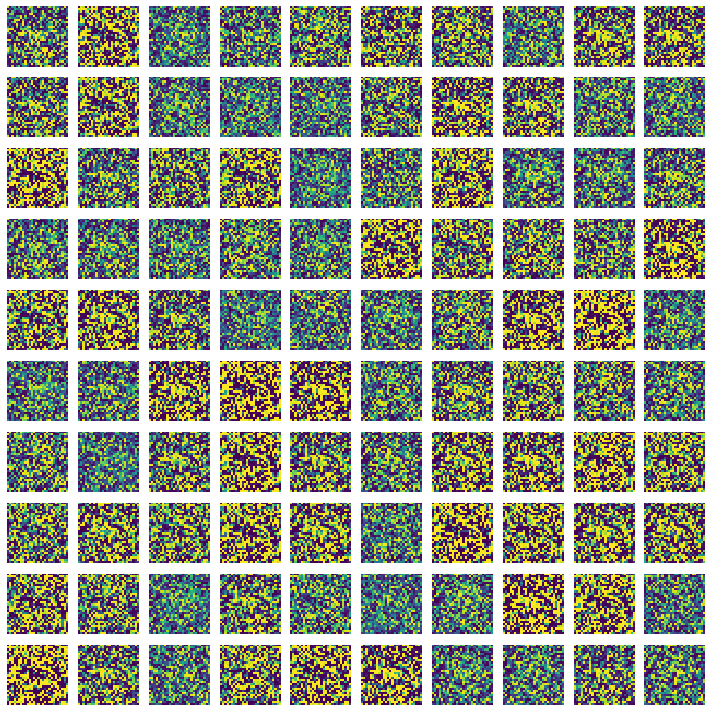

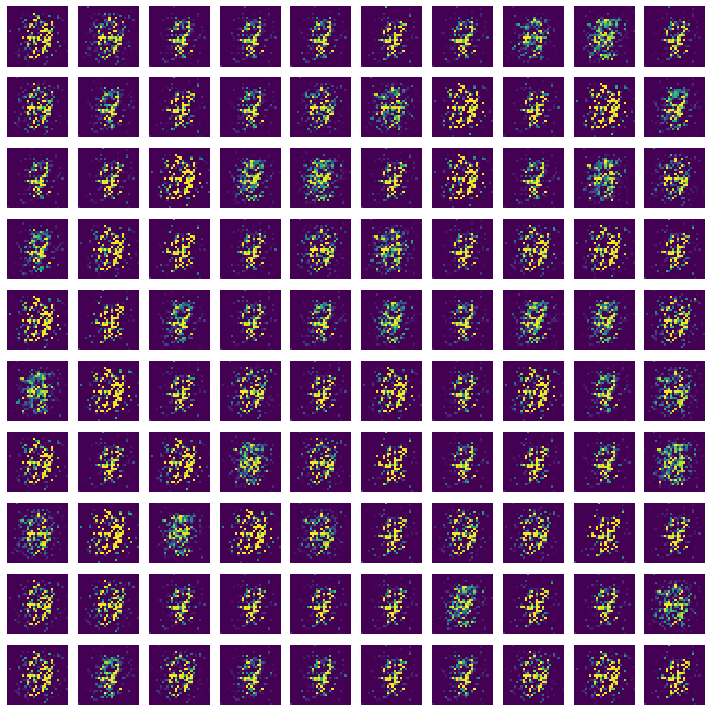

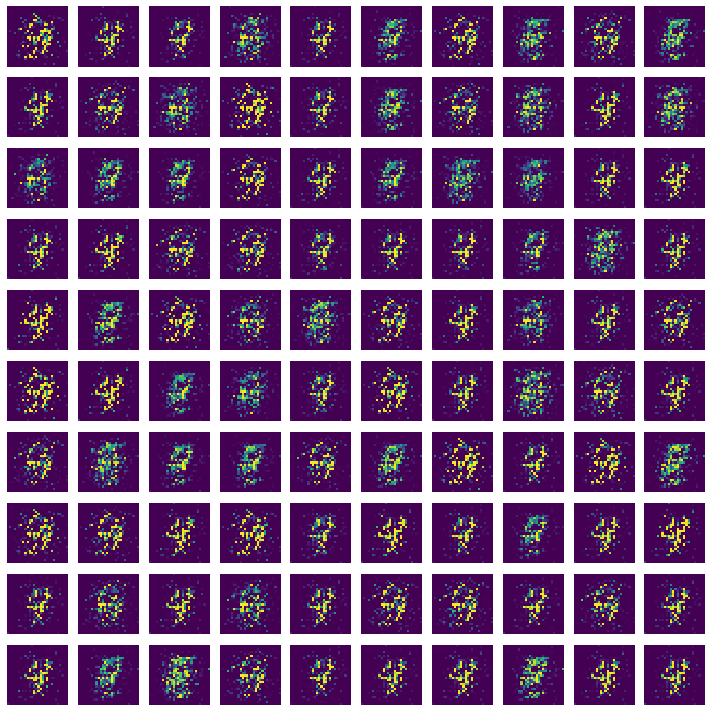

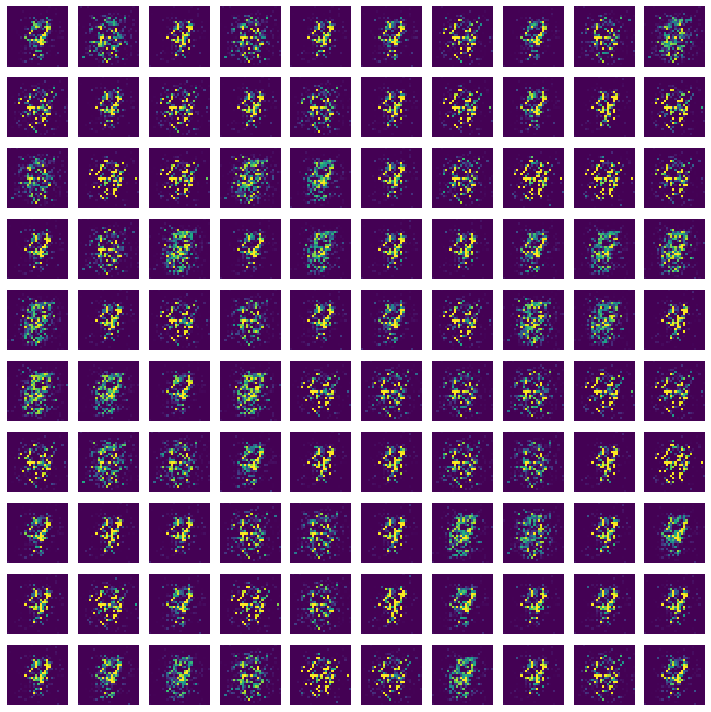

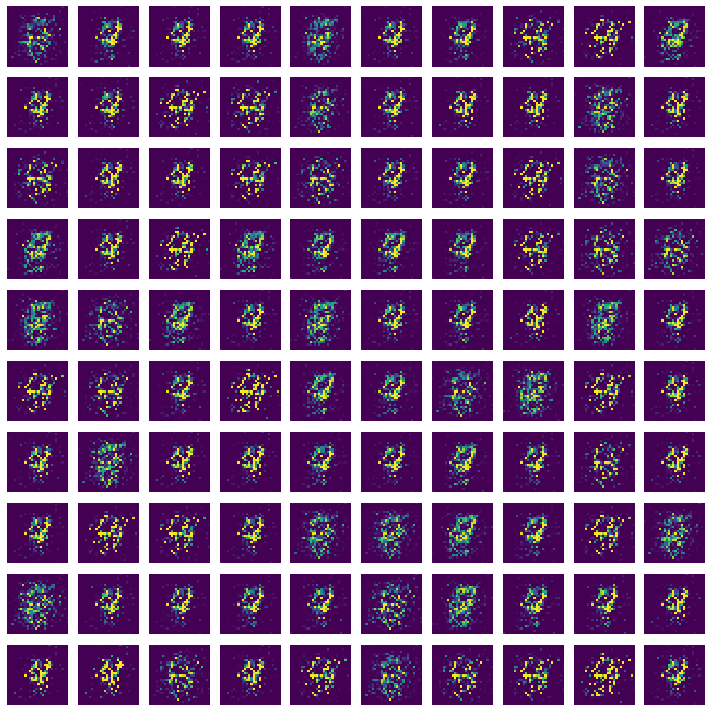

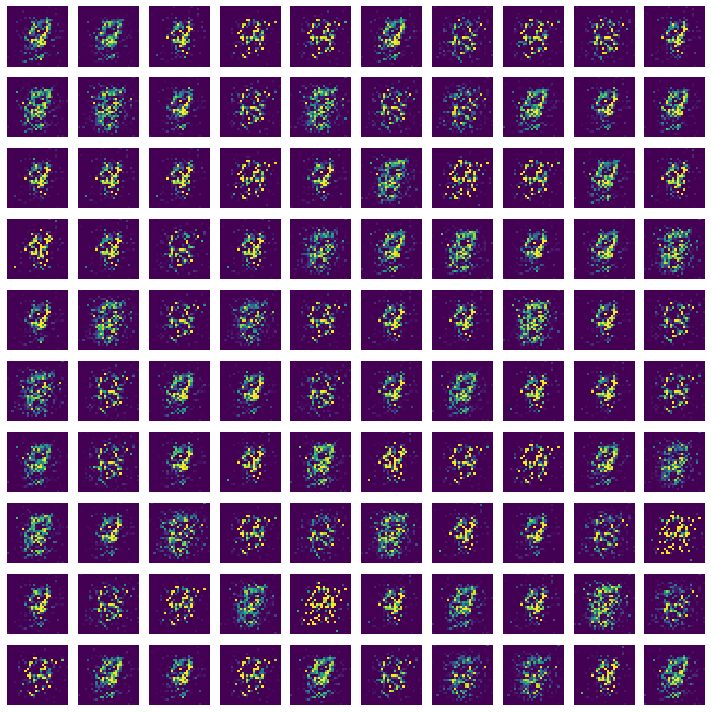

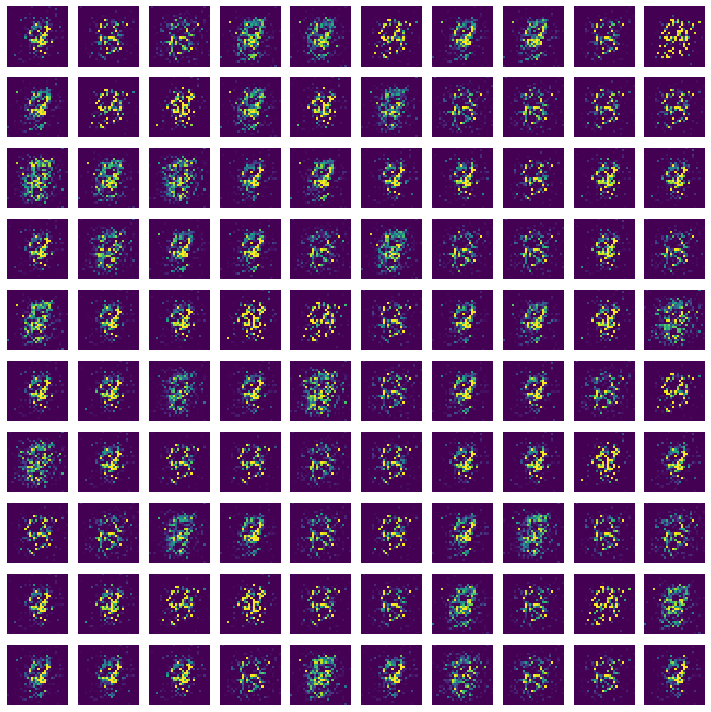

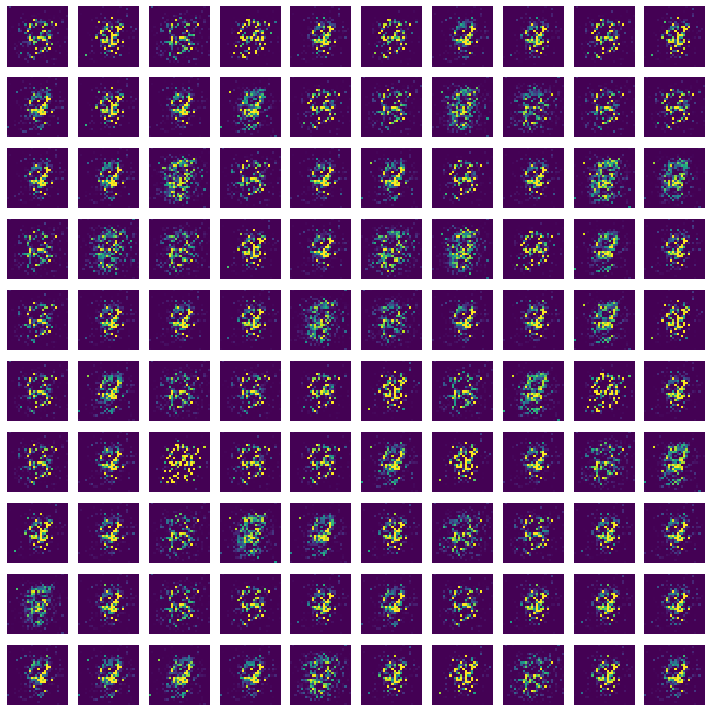

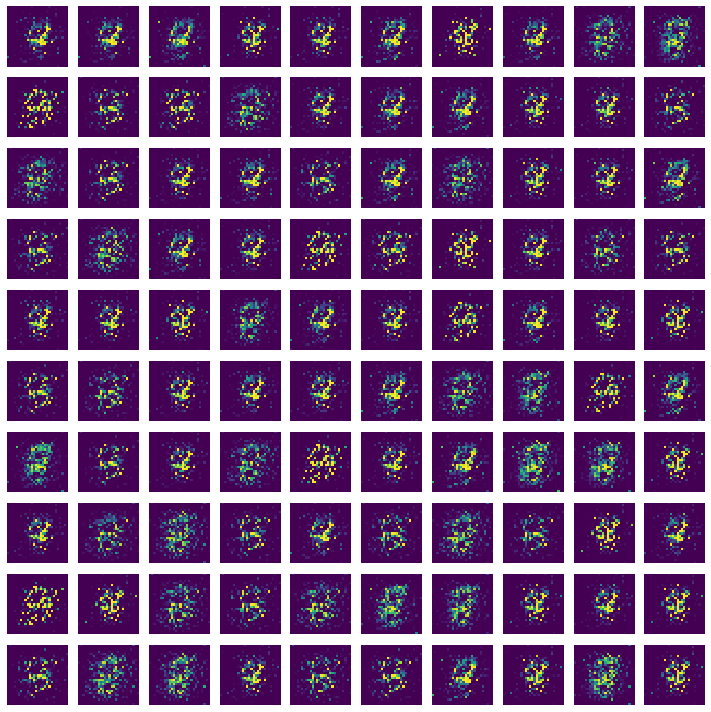

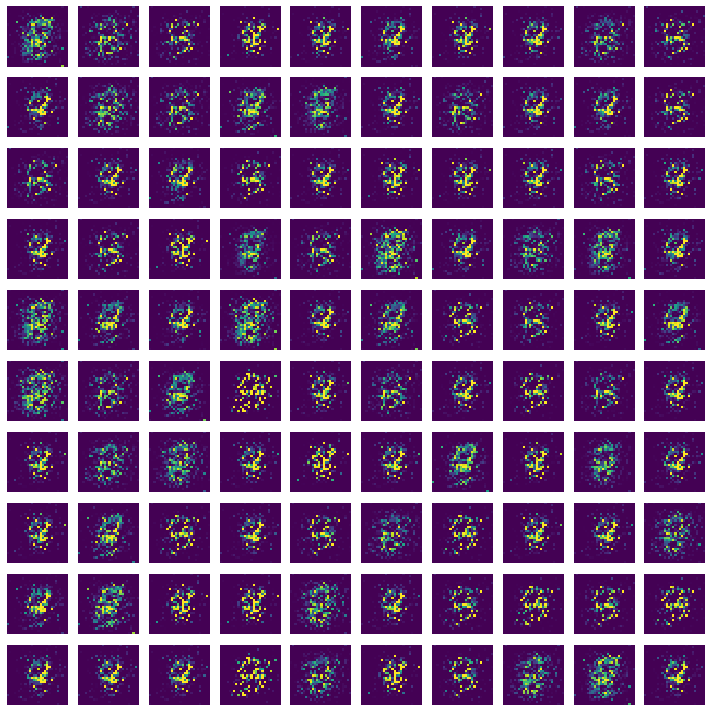

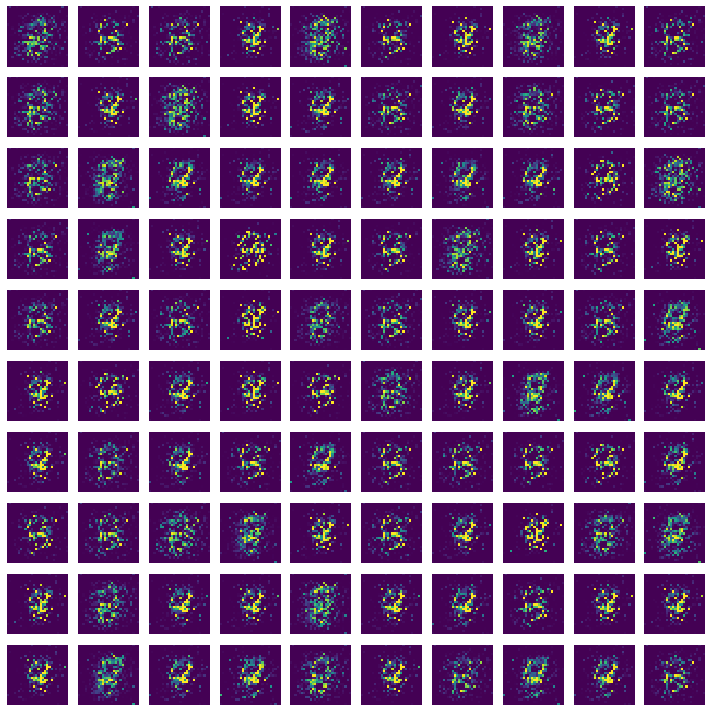

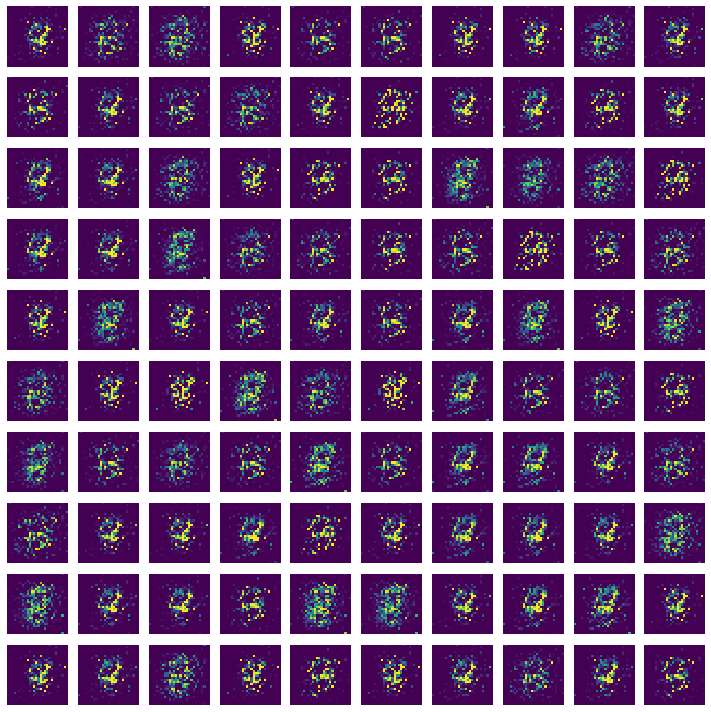

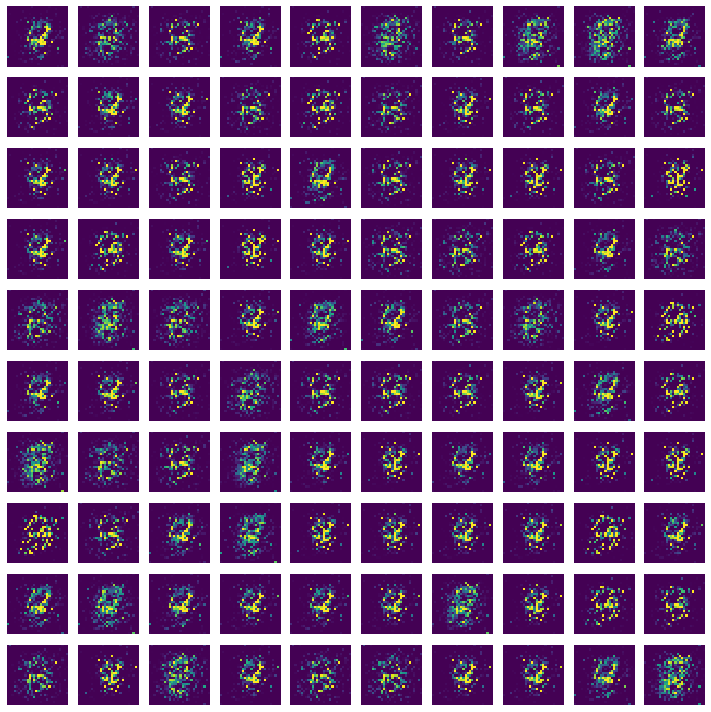

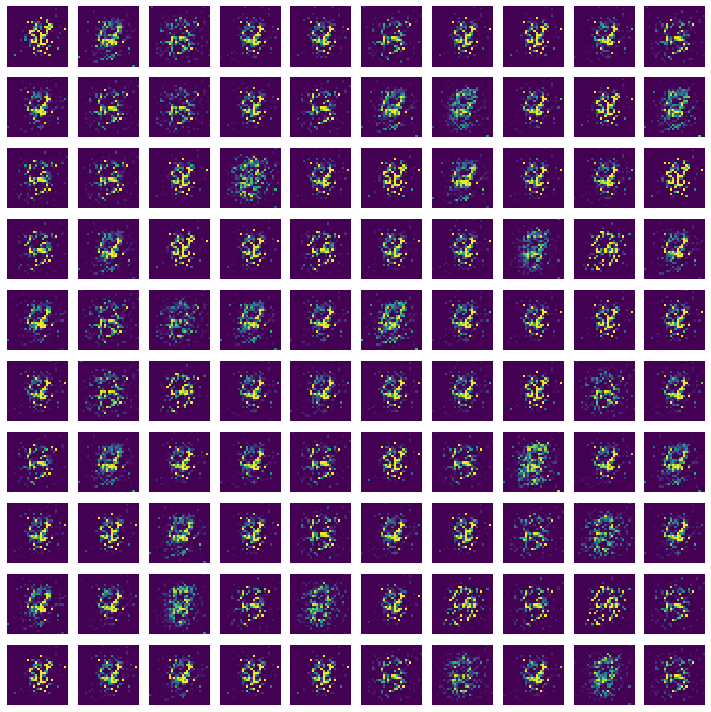

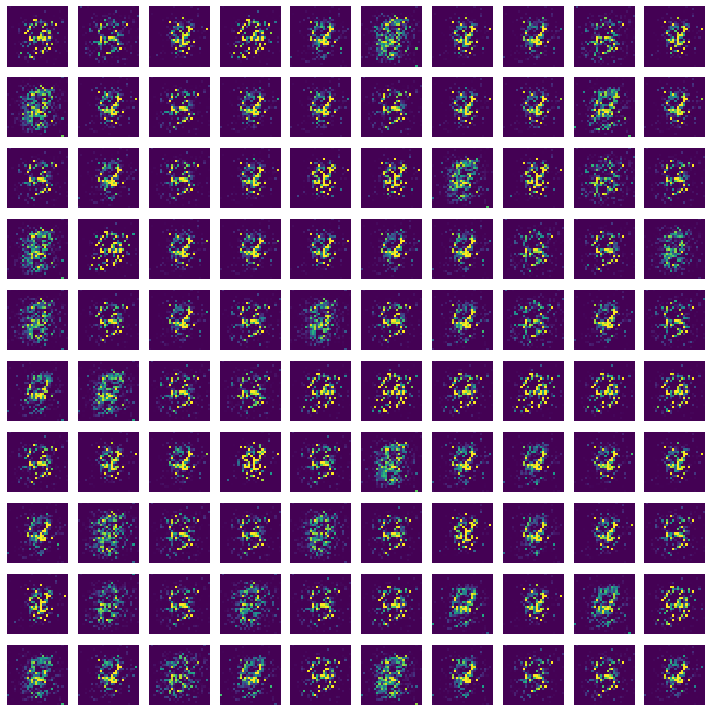

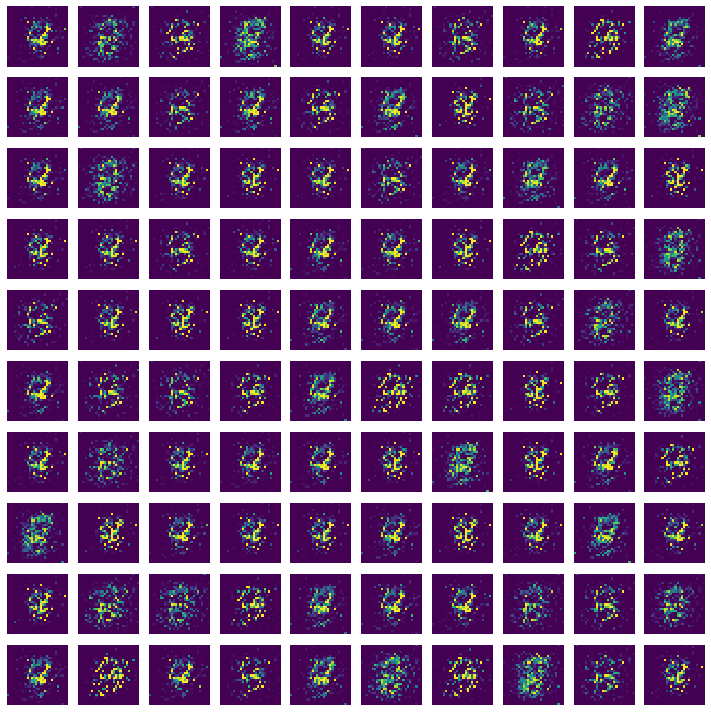

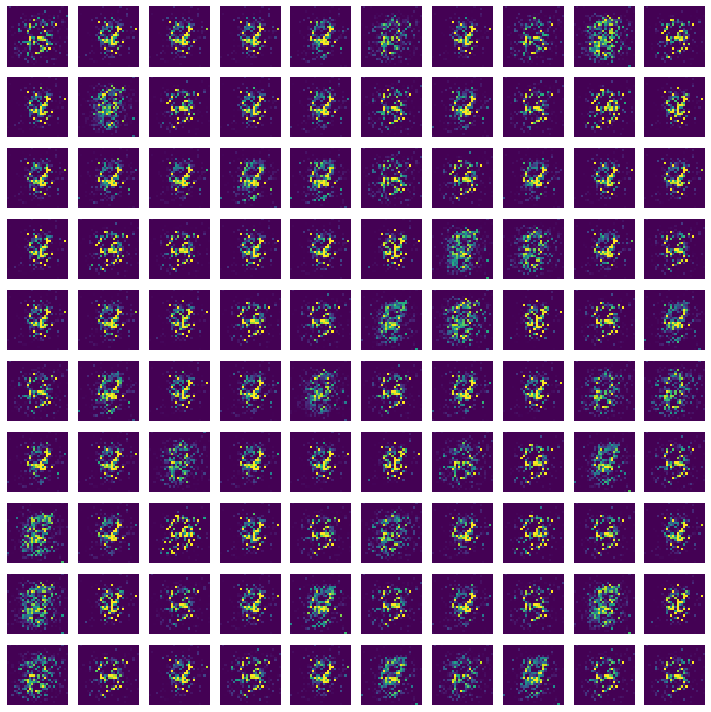

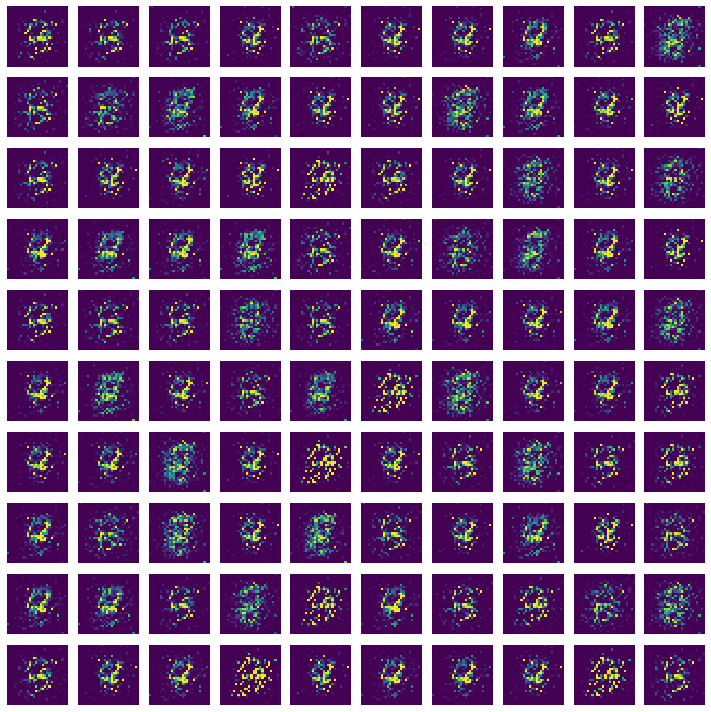

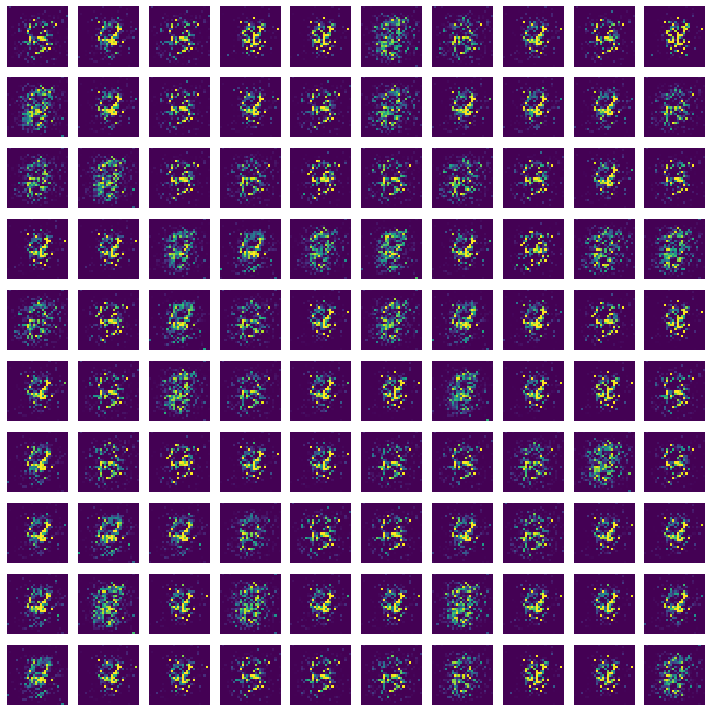

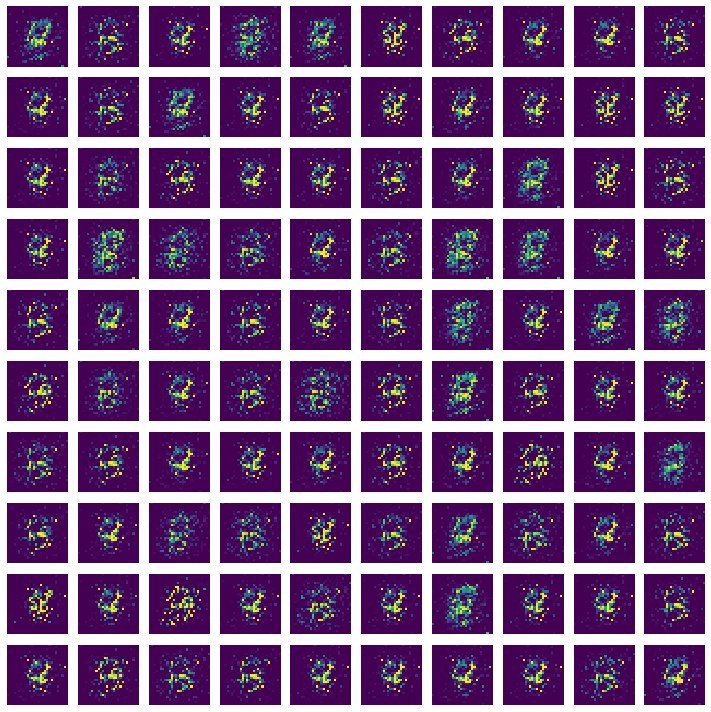

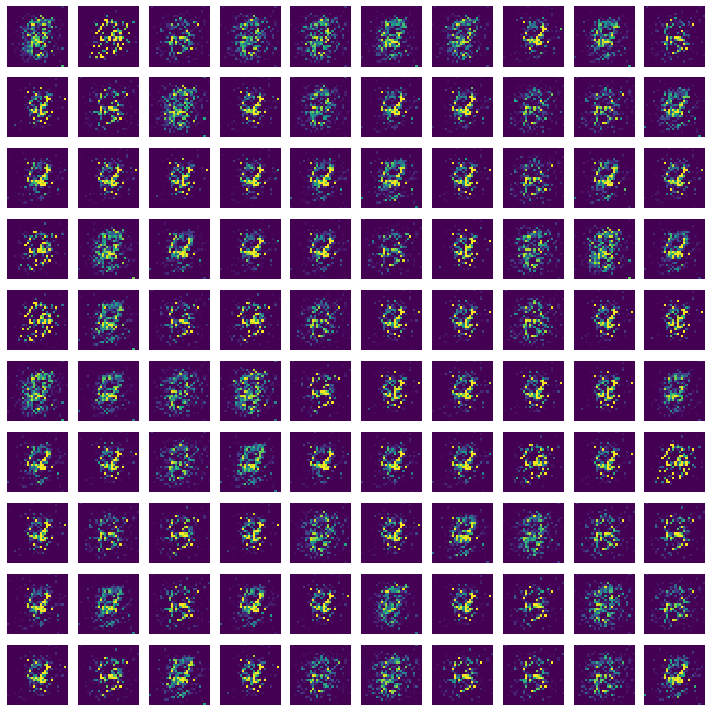

In [9]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=1
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if (e == 1) or (e % 20 == 0):
            plot_generated_images(e, generator)

training(400,128)